In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import sys
from collections import Counter

In [3]:
all_data = pd.DataFrame()

for f in glob.glob('./dot_under_0.2/NFRP_lung_target_*.xlsx'):
    df = pd.read_excel(f)
    all_data = all_data.append(df, ignore_index=True)

print(all_data.shape)

(409700, 22)


In [8]:
all_data.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,01088_A01_P010740_S00_N01_R1.00038.00038.2,1,QPVQVPVTLVR/2,0.138,0.024,[2],0,0.491,13,0.060,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q06330|SUH_HUMAN(pre=R,post=N)",204920315
1,01088_A01_P010740_S00_N01_R1.00177.00177.2,1,GVDLTEPTQPTR/2,0.182,0.011,[2],0,0.500,61,0.066,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P20339|RAB5A_HUMAN(pre=R,post=N)",93428339
2,01088_A01_P010740_S00_N01_R1.00178.00178.2,1,LSYSTSQEFSSR/2,0.123,0.019,[2],0,0.494,48,0.046,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q5VUB5|F1711_HUMAN(pre=K,post=E)",165457641
3,01088_A01_P010740_S00_N01_R1.00185.00185.2,1,DLEINAEEEPEK/2,0.152,0.022,[2],0,-0.005,32,0.062,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q12955|ANK3_HUMAN(pre=R,post=K)",32499455
4,01088_A01_P010740_S00_N01_R1.00189.00189.2,1,IPILSTFLTAR/2,0.160,0.005,[2],0,0.507,19,0.080,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q9UBB6|NCDN_HUMAN(pre=K,post=G)",115380768


In [9]:
lungT = all_data
lungT.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,01088_A01_P010740_S00_N01_R1.00038.00038.2,1,QPVQVPVTLVR/2,0.138,0.024,[2],0,0.491,13,0.060,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q06330|SUH_HUMAN(pre=R,post=N)",204920315
1,01088_A01_P010740_S00_N01_R1.00177.00177.2,1,GVDLTEPTQPTR/2,0.182,0.011,[2],0,0.500,61,0.066,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P20339|RAB5A_HUMAN(pre=R,post=N)",93428339
2,01088_A01_P010740_S00_N01_R1.00178.00178.2,1,LSYSTSQEFSSR/2,0.123,0.019,[2],0,0.494,48,0.046,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q5VUB5|F1711_HUMAN(pre=K,post=E)",165457641
3,01088_A01_P010740_S00_N01_R1.00185.00185.2,1,DLEINAEEEPEK/2,0.152,0.022,[2],0,-0.005,32,0.062,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q12955|ANK3_HUMAN(pre=R,post=K)",32499455
4,01088_A01_P010740_S00_N01_R1.00189.00189.2,1,IPILSTFLTAR/2,0.160,0.005,[2],0,0.507,19,0.080,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q9UBB6|NCDN_HUMAN(pre=K,post=G)",115380768


In [10]:
lungT1 = lungT.loc[:, ['ID']]
lungT1.head()

,ID
0,QPVQVPVTLVR/2
1,GVDLTEPTQPTR/2
2,LSYSTSQEFSSR/2
3,DLEINAEEEPEK/2
4,IPILSTFLTAR/2


In [11]:
lungt1 = lungT1.values.tolist()
lungt1 = np.concatenate(lungt1).tolist()
lungt1

['QPVQVPVTLVR/2',
 'GVDLTEPTQPTR/2',
 'LSYSTSQEFSSR/2',
 'DLEINAEEEPEK/2',
 'IPILSTFLTAR/2',
 'VESEQQYFEIEK/2',
 'LAKDPKPAIR/2',
 'QEQEDYQEMLQSLAQR/3',
 'AVIGIGIEEEDRK/2',
 'QDMGEEAEEEPQK/2',
 'VQPLPISTIIR/2',
 'VVLPTFILEK/2',
 'LPPVLVLHLK/2',
 'VESEQQYFEIEK/2',
 'VLQVIIQLR/2',
 'IPILSTFLTAR/2',
 'YGLLVGGAASHR/2',
 'KVILPDLAVLR/2',
 'AILFLPLPVSSD/2',
 'LKDDLFLGVK/2',
 'GGDAFGDTSFLSR/2',
 'GTALGSVPGGSITK/2',
 'LPPVLVLHLK/2',
 'LAKDPKPAIR/2',
 'LAKDPKPAIR/2',
 'LKDDLFLGVK/2',
 'KAATALKDVVK/2',
 'GYENEDNYSNIR/2',
 'RLLLQLEATK/2',
 'NLWGAVLQESK/2',
 'PLLGLVLTPTR/2',
 'VETEEGIGYDFR/2',
 'SIPQGIVAAWR/2',
 'INNFSADIKDSK/2',
 'SLSTLKPLLK/2',
 'YFDENAAEDFEK/2',
 'MLVMQDPIYR/2',
 'GLILKDHGIR/2',
 'VSHVLAALQAGNR/2',
 'TEEPMETEPK/2',
 'SIPQGIVAAWR/2',
 'MTIIGVILSFR/2',
 'EMQQQELAQMR/2',
 'KEVVATLLPSAK/2',
 'LPEWAADEPVEK/2',
 'EHFPQAYSVDMSR/2',
 'YFFDFLEEQAEK/2',
 'SIPQGIVAAWR/2',
 'DWEDDSDEDMSNFDR/3',
 'QPALVGAPGLSIK/2',
 'LLNILGLIFK/2',
 'LFMVLLLK/2',
 'GLHVMVPDIVQMHIETLEAVQR/3',
 'GLHVMVPDIVQMHI

In [12]:
seq_len = []
for i in lungt1:
    seq_len.append(len(i) - 2)
seq_len

[11,
 12,
 12,
 12,
 11,
 12,
 10,
 16,
 13,
 13,
 11,
 10,
 10,
 12,
 9,
 11,
 12,
 11,
 12,
 10,
 13,
 14,
 10,
 10,
 10,
 10,
 11,
 12,
 10,
 11,
 11,
 12,
 11,
 12,
 10,
 12,
 10,
 10,
 13,
 10,
 11,
 11,
 11,
 12,
 12,
 13,
 12,
 11,
 15,
 13,
 10,
 8,
 22,
 22,
 12,
 20,
 21,
 13,
 19,
 11,
 13,
 12,
 11,
 12,
 11,
 10,
 12,
 11,
 11,
 10,
 12,
 18,
 10,
 18,
 10,
 12,
 10,
 18,
 20,
 18,
 12,
 11,
 20,
 13,
 19,
 19,
 13,
 19,
 20,
 13,
 11,
 12,
 16,
 14,
 10,
 18,
 19,
 19,
 13,
 25,
 21,
 19,
 11,
 21,
 11,
 21,
 17,
 20,
 16,
 15,
 11,
 12,
 11,
 9,
 19,
 16,
 10,
 9,
 13,
 12,
 19,
 12,
 12,
 20,
 13,
 12,
 16,
 18,
 12,
 16,
 19,
 12,
 11,
 15,
 12,
 12,
 19,
 12,
 12,
 16,
 10,
 19,
 12,
 15,
 12,
 12,
 15,
 16,
 19,
 14,
 16,
 25,
 9,
 20,
 18,
 18,
 11,
 14,
 12,
 11,
 17,
 11,
 18,
 18,
 20,
 18,
 13,
 14,
 15,
 13,
 14,
 15,
 17,
 14,
 20,
 13,
 20,
 11,
 23,
 12,
 11,
 17,
 19,
 12,
 30,
 12,
 14,
 30,
 16,
 20,
 21,
 27,
 16,
 15,
 15,
 19,
 10,
 16,
 11,
 13,
 18,


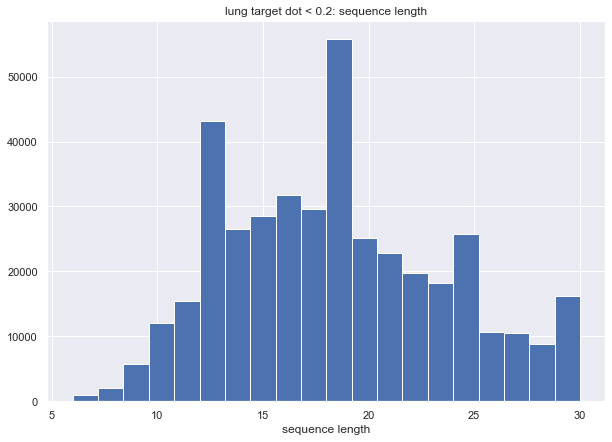

In [13]:
plt.figure(figsize = (10, 7))
plt.xlabel('sequence length')
plt.title('lung target dot < 0.2: sequence length')
seq_length = plt.hist(seq_len, bins = 20)

1.2000000000000002


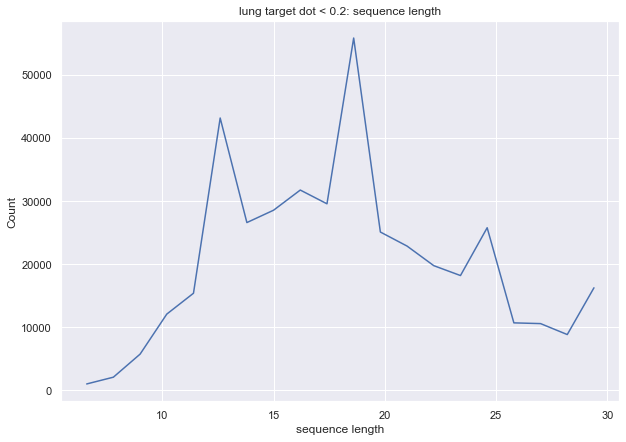

In [14]:
print(seq_length[1][1] - seq_length[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('sequence length')
plt.ylabel('Count')
plt.title('lung target dot < 0.2: sequence length')
plt.plot(seq_length[1][:-1] + 0.6, seq_length[0])
plt.show()

In [15]:
ch_state = []
for i in lungt1:
    ch_state.append(int(i[-1]))
ch_state

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 4,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 3,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 3,
 4,
 2,
 4,
 2,
 3,
 4,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 4,
 3,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 4,
 3,
 3,
 3,


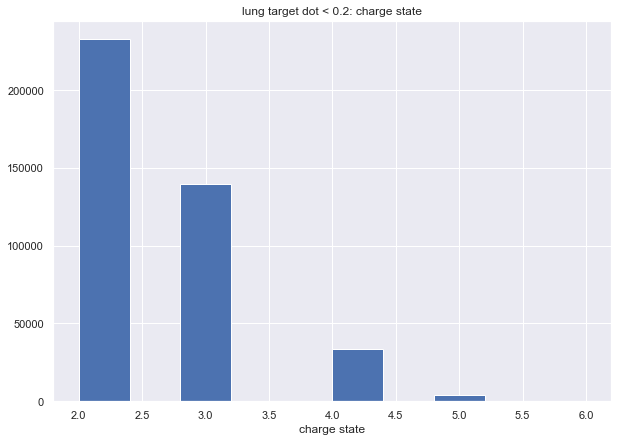

In [16]:
plt.figure(figsize = (10, 7))
plt.title('lung target dot < 0.2: charge state')
plt.xlabel('charge state')
charge_state = plt.hist(ch_state, bins = 10)

In [17]:
c_term = []
for i in lungt1:
    c_term.append(i[-3])
c_term

['R',
 'R',
 'R',
 'K',
 'R',
 'K',
 'R',
 'R',
 'K',
 'K',
 'R',
 'K',
 'K',
 'K',
 'R',
 'R',
 'R',
 'R',
 'D',
 'K',
 'R',
 'K',
 'K',
 'R',
 'R',
 'K',
 'K',
 'R',
 'K',
 'K',
 'R',
 'R',
 'R',
 'K',
 'K',
 'K',
 'R',
 'R',
 'R',
 'K',
 'R',
 'R',
 'R',
 'K',
 'K',
 'R',
 'K',
 'R',
 'R',
 'K',
 'K',
 'K',
 'R',
 'R',
 'K',
 'K',
 'K',
 'R',
 'K',
 'K',
 'R',
 'K',
 'K',
 'R',
 'K',
 'R',
 'K',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'K',
 'K',
 'R',
 'R',
 'R',
 'K',
 'R',
 'R',
 'R',
 'K',
 'K',
 'R',
 'K',
 'K',
 'R',
 'R',
 'K',
 'R',
 'K',
 'K',
 'R',
 'K',
 'R',
 'R',
 'R',
 'K',
 'K',
 'R',
 'R',
 'R',
 'K',
 'R',
 'K',
 'K',
 'K',
 'R',
 'K',
 'R',
 'R',
 'K',
 'R',
 'K',
 'K',
 'R',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'R',
 'K',
 'K',
 'R',
 'R',
 'R',
 'K',
 'R',
 'K',
 'K',
 'K',
 'K',
 'R',
 'K',
 'R',
 'R',
 'K',
 'R',
 'K',
 'K',
 'R',
 'K',
 'K',
 'R',
 'K',
 'R',
 'R',
 'K',
 'R',
 'R',
 'R',
 'R',
 'R',
 'K',
 'R',
 'R',
 'R',
 'K',
 'K',
 'R',
 'R'

In [18]:
counter1 = Counter(c_term)
counter1

Counter({'R': 189563,
         'K': 215994,
         'D': 407,
         'E': 633,
         'T': 118,
         'H': 259,
         'S': 561,
         'L': 346,
         'Q': 329,
         'V': 208,
         'Y': 236,
         'N': 198,
         'I': 72,
         'A': 220,
         'G': 61,
         'F': 165,
         'M': 138,
         'P': 185,
         'W': 7})

<function matplotlib.pyplot.show(close=None, block=None)>

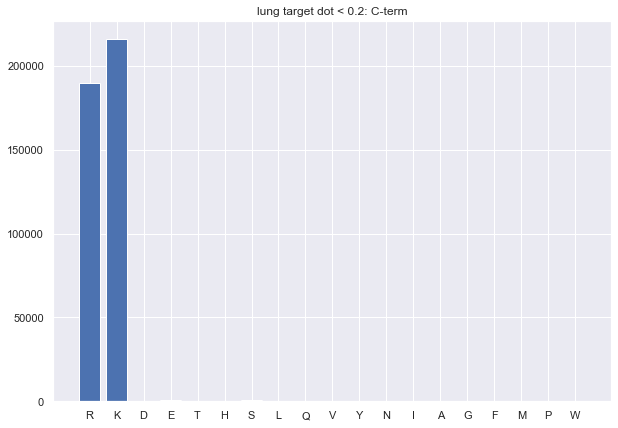

In [19]:
plt.figure(figsize = (10, 7))
plt.title('lung target dot < 0.2: C-term')
plt.bar(counter1.keys(), counter1.values())
plt.show

In [20]:
seq = []
for i in lungt1:
    seq.append(i[:-2])
seq

['QPVQVPVTLVR',
 'GVDLTEPTQPTR',
 'LSYSTSQEFSSR',
 'DLEINAEEEPEK',
 'IPILSTFLTAR',
 'VESEQQYFEIEK',
 'LAKDPKPAIR',
 'QEQEDYQEMLQSLAQR',
 'AVIGIGIEEEDRK',
 'QDMGEEAEEEPQK',
 'VQPLPISTIIR',
 'VVLPTFILEK',
 'LPPVLVLHLK',
 'VESEQQYFEIEK',
 'VLQVIIQLR',
 'IPILSTFLTAR',
 'YGLLVGGAASHR',
 'KVILPDLAVLR',
 'AILFLPLPVSSD',
 'LKDDLFLGVK',
 'GGDAFGDTSFLSR',
 'GTALGSVPGGSITK',
 'LPPVLVLHLK',
 'LAKDPKPAIR',
 'LAKDPKPAIR',
 'LKDDLFLGVK',
 'KAATALKDVVK',
 'GYENEDNYSNIR',
 'RLLLQLEATK',
 'NLWGAVLQESK',
 'PLLGLVLTPTR',
 'VETEEGIGYDFR',
 'SIPQGIVAAWR',
 'INNFSADIKDSK',
 'SLSTLKPLLK',
 'YFDENAAEDFEK',
 'MLVMQDPIYR',
 'GLILKDHGIR',
 'VSHVLAALQAGNR',
 'TEEPMETEPK',
 'SIPQGIVAAWR',
 'MTIIGVILSFR',
 'EMQQQELAQMR',
 'KEVVATLLPSAK',
 'LPEWAADEPVEK',
 'EHFPQAYSVDMSR',
 'YFFDFLEEQAEK',
 'SIPQGIVAAWR',
 'DWEDDSDEDMSNFDR',
 'QPALVGAPGLSIK',
 'LLNILGLIFK',
 'LFMVLLLK',
 'GLHVMVPDIVQMHIETLEAVQR',
 'GLHVMVPDIVQMHIETLEAVQR',
 'TYTIANQFPLNK',
 'VSGGVDMSSHQEVFASLFHK',
 'YGNDSSAELSELHSAALASLK',
 'VSHVLAALQAGNR',
 'TTYLEDL

In [21]:
amino_acid = []
for i in seq:
    for j in i:
        amino_acid.append(j)
amino_acid

['Q',
 'P',
 'V',
 'Q',
 'V',
 'P',
 'V',
 'T',
 'L',
 'V',
 'R',
 'G',
 'V',
 'D',
 'L',
 'T',
 'E',
 'P',
 'T',
 'Q',
 'P',
 'T',
 'R',
 'L',
 'S',
 'Y',
 'S',
 'T',
 'S',
 'Q',
 'E',
 'F',
 'S',
 'S',
 'R',
 'D',
 'L',
 'E',
 'I',
 'N',
 'A',
 'E',
 'E',
 'E',
 'P',
 'E',
 'K',
 'I',
 'P',
 'I',
 'L',
 'S',
 'T',
 'F',
 'L',
 'T',
 'A',
 'R',
 'V',
 'E',
 'S',
 'E',
 'Q',
 'Q',
 'Y',
 'F',
 'E',
 'I',
 'E',
 'K',
 'L',
 'A',
 'K',
 'D',
 'P',
 'K',
 'P',
 'A',
 'I',
 'R',
 'Q',
 'E',
 'Q',
 'E',
 'D',
 'Y',
 'Q',
 'E',
 'M',
 'L',
 'Q',
 'S',
 'L',
 'A',
 'Q',
 'R',
 'A',
 'V',
 'I',
 'G',
 'I',
 'G',
 'I',
 'E',
 'E',
 'E',
 'D',
 'R',
 'K',
 'Q',
 'D',
 'M',
 'G',
 'E',
 'E',
 'A',
 'E',
 'E',
 'E',
 'P',
 'Q',
 'K',
 'V',
 'Q',
 'P',
 'L',
 'P',
 'I',
 'S',
 'T',
 'I',
 'I',
 'R',
 'V',
 'V',
 'L',
 'P',
 'T',
 'F',
 'I',
 'L',
 'E',
 'K',
 'L',
 'P',
 'P',
 'V',
 'L',
 'V',
 'L',
 'H',
 'L',
 'K',
 'V',
 'E',
 'S',
 'E',
 'Q',
 'Q',
 'Y',
 'F',
 'E',
 'I',
 'E',
 'K',
 'V',
 'L'

In [27]:
counter2 = Counter(amino_acid)
sorted(counter2.items())

[('A', 528615),
 ('D', 595220),
 ('E', 801255),
 ('F', 261361),
 ('G', 506249),
 ('H', 197266),
 ('I', 297887),
 ('K', 316932),
 ('L', 639586),
 ('M', 161425),
 ('N', 305042),
 ('P', 482507),
 ('Q', 392669),
 ('R', 240838),
 ('S', 640158),
 ('T', 404010),
 ('V', 428691),
 ('W', 76758),
 ('Y', 228068)]

<function matplotlib.pyplot.show(close=None, block=None)>

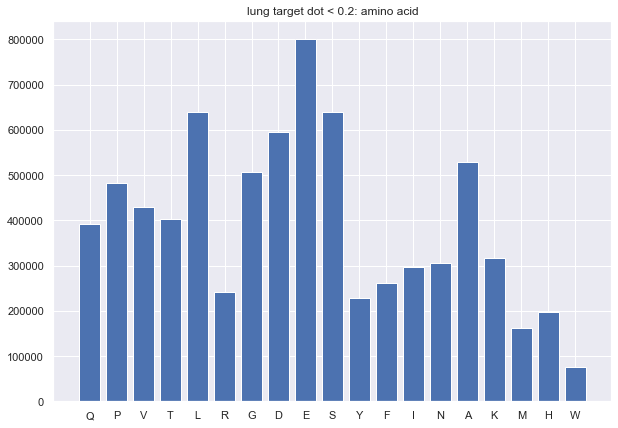

In [23]:
plt.figure(figsize = (10, 7))
plt.title('lung target dot < 0.2: amino acid')
plt.bar(counter2.keys(), counter2.values())
plt.show

In [24]:
lungT2 = lungT.loc[:, ['MzDiff']]
lungT2.head()

,MzDiff
0,0.491
1,0.500
2,0.494
3,-0.005
4,0.507


In [25]:
lungt2 = lungT2.values.tolist()
lungt2 = np.concatenate(lungt2).tolist()
lungt2

[0.491,
 0.5,
 0.494,
 -0.005,
 0.507,
 0.009,
 0.004,
 -0.008,
 -0.002,
 0.498,
 0.01,
 0.002,
 -0.007,
 0.009,
 0.506,
 0.507,
 0.007,
 -0.008,
 0.507,
 0.503,
 -0.006,
 -0.001,
 0.01,
 0.005,
 0.007,
 0.503,
 0.5,
 0.493,
 -0.006,
 0.009,
 0.495,
 0.497,
 0.492,
 0.507,
 0.501,
 -0.004,
 0.508,
 0.507,
 0.502,
 -0.008,
 0.494,
 0.51,
 0.496,
 0.506,
 0.505,
 -0.001,
 0.492,
 0.492,
 -0.009,
 0.005,
 0.498,
 0.507,
 0.006,
 0.256,
 -0.005,
 0.008,
 0.0,
 0.503,
 0.328,
 0.007,
 0.502,
 0.495,
 0.002,
 -0.008,
 0.002,
 0.002,
 -0.005,
 0.491,
 0.508,
 0.004,
 0.506,
 -0.001,
 0.508,
 -0.008,
 0.508,
 -0.008,
 -0.009,
 0.004,
 0.34,
 -0.008,
 0.005,
 0.502,
 0.341,
 0.005,
 0.338,
 0.001,
 0.001,
 0.34,
 0.256,
 0.496,
 0.509,
 0.506,
 0.498,
 0.499,
 0.5,
 0.325,
 0.498,
 -0.003,
 0.504,
 0.003,
 0.335,
 0.329,
 0.001,
 0.334,
 0.503,
 0.001,
 0.5,
 0.339,
 0.001,
 0.008,
 0.493,
 0.009,
 0.501,
 0.002,
 0.339,
 0.005,
 -0.009,
 0.01,
 -0.01,
 0.51,
 -0.005,
 0.496,
 0.497,
 0.006,
 0

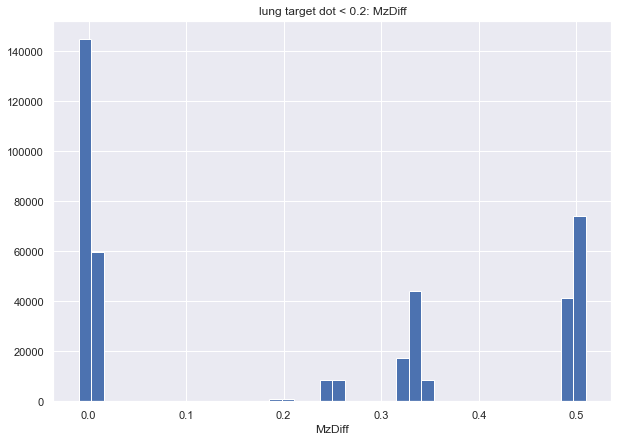

In [26]:
plt.figure(figsize = (10, 7))
plt.xlabel('MzDiff')
plt.title('lung target dot < 0.2: MzDiff')
MzDiff = plt.hist(lungt2, bins = 40)